# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary (vorläufig) results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=2))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [10]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data.loc[data['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data.loc[data['income'] == '<=50K'].shape[0]

# count all the different elements in the income column
#n_at_most_50k, n_greater_50k = data.income.value_counts()

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously (ungemein) with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features (Skewed - Verzogen)
A dataset may sometimes contain at least one feature whose values tend to lie (liegen) near a single number, but will also have a non-trivial number of vastly (enorm, riesig) larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

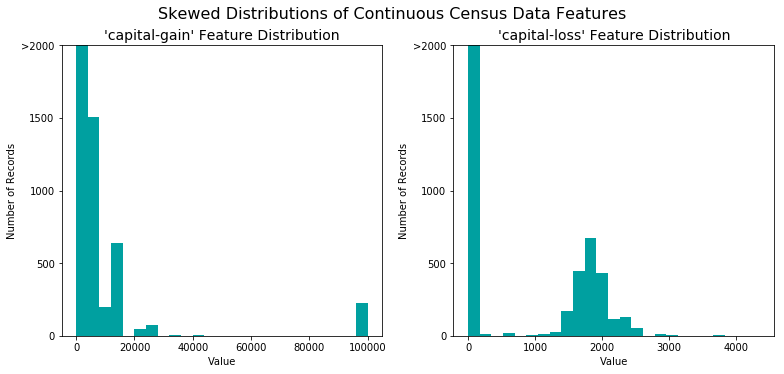

In [11]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

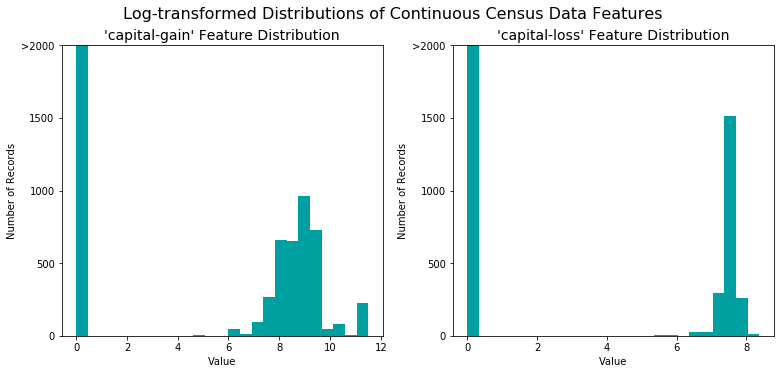

In [12]:
# Log-transform the skewed(verzogen) features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [13]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # Transforms features by scaling each feature to a given range. default range: (0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [14]:
print("{} total features before one-hot encoding.".format(len(list(features_log_minmax_transform.columns))))

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = [0 if value =='<=50K' else 1 for value in income_raw] # CHANGED!!!!
# one line representation of the following
# for value in income_raw:
#    if value == '<=50K':
#        value = 0
#    else
#        value = 1
# 1 if value =='<=50K' else 0;

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

13 total features before one-hot encoding.
103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [15]:
# Import train_test_split
# ERROR: from sklearn.cross_validation import train_test_split
# https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
#May be it's due to the deprecation of sklearn.cross_validation. Please replace sklearn.cross_validation with sklearn.model_selection

from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#print(X_train.head(n = 5))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental(schädlich) to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall**(abfragen, abrufen, kündigen) those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).
$$\frac{True Positives + True Negatives}{\text{nb of all test data points}} = \frac{TP+TN}{TP+TN+FP+FN}$$

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of
$$\frac{True Positives}{(True Positives + False Positives)} = \frac{TP}{TP + FP}$$


**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

$$\frac{True Positives}{(True Positives + False Negatives)} = \frac{TP}{TP+FN}$$

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [16]:
TP = float(np.sum(income)) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                    # encoded to numerical values done in the data preprocessing step.
FP = float(len(income) - TP) # Specific to the naive case

TN = 0.0 # No predicted negatives in the naive case
FN = 0.0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+TN+FP+FN)
# ratio of the number of correct predictions to the total number of predictions (the number of test data points).

recall = TP/(TP+FN) # [True Positives/(True Positives + False Negatives)]
precision = TP/(TP+FP) # [True Positives/(True Positives + False Positives)]

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2)*((precision*recall)/((beta**2 * precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

#### Details on the mentioned Supervised Learning Models
***Gaussian Naive Bayes (GaussianNB)***

- based on the Bayes theorem
- a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
- When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. 
- Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. [Reference](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c)
- NB has high bais and low variance. Hence it makes its application limited

Use Cases:
- Classify mails as *spam* or *not-spam*
- Classify a newspaper article to a topic (based on word occurances in the text)

***Decision Trees***

- When we fit a decision tree to a training dataset, the top few nodes on which the tree is split are essentially the most important variables within the dataset and feature selection is completed automatically!
- Decision trees require relatively little effort from users for data preparation
- Nonlinear relationships between parameters do not affect tree performance

Use Cases: 
- In finance, forecasting future outcomes and assigning probabilities to those outcomes
- Customer’s willingness to purchase a given product in a given setting, i.e. offline and online both

***Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)***

- the first step of Ensemble Methods is to create multiple classification/regression models using some training dataset. Each base model can be created using different splits of the same training dataset and same algorithm, or using the same dataset with different algorithms, or any other method. [Reference](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning)

***K-Nearest Neighbors (KNeighbors)***

- k-NN is often used in search applications where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”. [Reference](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm)

Use Cases:
- Recommondation System (propose similar products)
- semantically similar documents (i.e., documents containing similar topics)

***Stochastic Gradient Descent Classifier (SGDC)***

- SGD has been successfully applied to large-scale and **sparse** machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features. [Reference](http://scikit-learn.org/stable/modules/sgd.html)

***Support Vector Machines (SVM)***

Use Cases:
- Handwriting recognition
- Face detection 
- Classification of images
- [Reference](https://data-flair.training/blogs/applications-of-svm/)

***Logistic Regression***
- Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

Potential algorithms: Gaussian Naive Bayes (GaussianNB), Decision Trees, Ensemble Methods, K-Nearest Neighbors, SVMs, Logitstic Regression

Picking the right algorithm: 
- http://scikit-learn.org/stable/tutorial/machine_learning_map/ --> SVC
- https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/ --> kernelSVM, Random Forest, NN, Gradient Boosting Tree


### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

### Answer - Question 2
#### Model 1 - Gradient Boosting Classifier (GBT)
Boosting classifiers use weak learners which performe slightly better than a random choice. These weak learners are then combined to get better.

One real-world example for a gradient boosting classifier (GBT) is the search engine of Yahoo. The search engine uses it to distinguish between relevant and irrelevant URLs [ref](http://www.kdd.org/kdd2016/papers/files/adf0361-yinA.pdf). Another example are anomaly detection in unbalanced data sets as DNA sequences [ref](https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80).

Strength of the model:
One of the strength of the gradient boosting classifier is its simpleness. No mathematical notation is needed for the understanding. GBTs build consecutively trees to split the data. Each subsequent tree can correct errors made by previously trained trees [ref](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests).

Weaknesses of the model:
GBTs build the trees sequentially, so the training takes some time. Gradient boosting needs a lot of training data as it is prone to overfitting [ref](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests).


Good kandidate for the problem:
Even when GBT needs time to train, it performs good. The GBT is able to learn correlation between different features, which is useful for this data set [ref](https://medium.com/data-design/ensembles-of-tree-based-models-why-correlated-features-do-not-trip-them-and-why-na-matters-7658f4752e1b). As GBT Methods only have three parameters, it is not too complex in understanding [ref](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests).

#### Model 2 - Decision Trees

Real-world application:
If a decision tree was trained, it can be used as an answer wisard too find helpful information for users, like shown by ATS Trust [ref](https://www.funderstanding.com/blog/real-life-application-decision-trees/). Another use case is the diagnosis of illnesses. Here the tree uses pattern of syntoms to differentiate different therapies or clinical subtypes [ref](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/).

Strength of the model:
Decision trees are easy to understand and interpret. To use decision trees, no assumptions about the linearity of the data has to be made [ref](http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics). Another strength of the model is, that it can handle non-perfect data, like missing values or outliers [ref](http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics).

Weaknesses of the model:
The weakness of this model is when one constraint is described by several variables, theses variables are not examined collectivly. The trees assume that all variables have dependencies to each other. This is an assumption for this data set [ref](https://stats.stackexchange.com/questions/1292/what-is-the-weak-side-of-decision-trees).
Another weakness of decision trees is the notion for overfitting when the tree growth is not limited [ref](http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics).

Good kandidate for the problem:
The decision tree approach was chosen, because it was mentioned in the paper which provided the data set. The researcher used the decision tree approach to segment the data, and that is a similar use case like for this project.

#### Model 3 - Linear SVM
Real-world application:
A real-world application is the classification of documents into categories. The number of categories is predefined. The text, for eample a news paper article, is analysed and categorised. [ref](https://arxiv.org/pdf/math/0612817.pdf)

Strength of the model:
The plane to divide the data has the same dimensionality as the data. The basic algorithm finds a possible split of the data. Each SVM has a kernel, with an appropriate kernel function any problem can be solved [ref](https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/).

Weaknesses of the model:
The kernel is one of the advantages and disadvantages of SVMs. You have to chose a particular kernel for each problem to find a good solution. This means SVMs do not make any assumptions about the structure in the data [ref](https://www.reddit.com/r/MachineLearning/comments/3zqwbc/where_do_support_vector_machines_perform_badly/). 

Good kandidate for the problem:
SVMs search for a way to seperate the data on a hyperplane. The target is to divide the categories so that there is a clear gap between them [ref](https://en.wikipedia.org/wiki/Support_vector_machine). The assumption to chose this algorithm is, that people who earn more than $50.000 are easily seperatable from people who earn less.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [17]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
       
    # Success
    print("{} trained on {} samples. \nResults: acc_test: {} f_test: {}".format(learner.__class__.__name__, 
                                                                                sample_size,
                                                                                results['acc_test'],
                                                                                results['f_test']))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GradientBoostingClassifier trained on 361 samples. 
Results: acc_test: 0.8318407960199005 f_test: 0.6609288730107178
GradientBoostingClassifier trained on 3617 samples. 
Results: acc_test: 0.855942509673853 f_test: 0.7216040542029304
GradientBoostingClassifier trained on 36177 samples. 
Results: acc_test: 0.8630182421227197 f_test: 0.7395338561802719


DecisionTreeClassifier trained on 361 samples. 
Results: acc_test: 0.7597567716970702 f_test: 0.5152591089694819
DecisionTreeClassifier trained on 3617 samples. 
Results: acc_test: 0.8044223327805418 f_test: 0.5990824862822705
DecisionTreeClassifier trained on 36177 samples. 
Results: acc_test: 0.8189054726368159 f_test: 0.6286401035407229


LinearSVC trained on 361 samples. 
Results: acc_test: 0.8075179657269209 f_test: 0.6031634798278106
LinearSVC trained on 3617 samples. 
Results: acc_test: 0.839690436705362 f_test: 0.6801689591682009
LinearSVC trained on 36177 samples. 
Results: acc_test: 0.8426755113322277 f_test: 0.6855643044619422

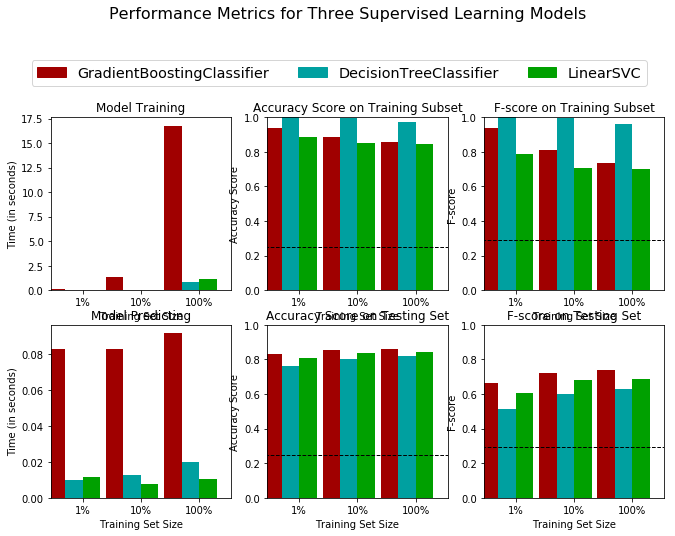

In [18]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

random_state= np.random.RandomState(9)

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state = random_state)
# GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, 
#                            criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, 
#                            min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
#                            min_impurity_split=None, init=None, random_state=None, max_features=None, 
#                            verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)

clf_B = DecisionTreeClassifier(random_state = random_state)
# DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, 
#                        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                        max_features=None, random_state=None, max_leaf_nodes=None, 
#                        min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# clf_C = LogisticRegression(random_state = random_state)
# LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, 
#                    verbose=0, warm_start=False, n_jobs=None)[source]¶

# clf_C = RandomForestClassifier(random_state = random_state)
# RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                        bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
#                        warm_start=False, class_weight=None)
    
# clf_D = KNeighborsClassifier(n_neighbors = 5)
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
#                      metric=’minkowski’, metric_params=None, n_jobs=1)

clf_C = LinearSVC(dual = False, random_state = random_state)
# LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, 
#           fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, 
#           random_state=None, max_iter=1000)
# Prefer dual=False when n_samples > n_features.



# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100/10)
samples_1 = int(samples_100/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
    print("\n")

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Answer - Question 3
The goal of CharityML is to find individuals which make more than `$50.000`. So the focus was to find an algorithm which does not claim people to earn more than `$50.000`, if they don't. So the accuracy, the F1-Score and the true Positives need to be high.

Three algorithms had been tested to solve this problem. The accuracy and the F1-Score of the Gradient Boost Classifier, Decision Trees and the SVM are close to each other.
The gradient Boost algorithm was rejected, because the training and evaluation time was ignificantly higher than for the other algorithms.

The SVM algorithm was chosen because it had better accuracy and F1-scores. SVMs are a broad concept which can be used for different data sets.


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

### Answer - Question 4
A Support Vector Machine uses a geometrical formula to differentiate between the two classes. All persons are described by lots of different variables.

Assume, there would only be two basic variables, the body height and the income of the person. Let's simulate, that there is a correlation between these two values: Little persons earn a lot of money whereas tall persons earn less money. If you would plot this data, there would be a gap between the two groups. And there would be a height to distiguish if a person earns more or less than `$`50.000. The SVM algrotihm would then search for this threshold value. It would start with a random value and measure how good the split is. Depending on which side are too many values/persons misclassified, the threshold is adapted. This adaptation continues until the seperation between the classes is satisfying. After this training, the algorithm can predict by using the body height how much a person does earn.

The Support Vector Machine does the same thing as described above, but it's using all available variables, not only two.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [19]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import LinearSVC

# Initialize the classifier
clf = LinearSVC(random_state = random_state)
# LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, 
#           fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, 
#           random_state=None, max_iter=1000)
# Prefer dual=False when n_samples > n_features.

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'tol':[0.000001, 0.0001, 0.01, 1.0, 10.0] , 'C':[1, 10,100], 'max_iter': [100, 1000]}
# loss: defult -> squared_hinge
# tol (Tolerance for stopping criteria) default -> 0.0001(1e-4)

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)
#ftwo_scorer = make_scorer(fbeta_score, beta=2)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/m

/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/svm

Unoptimized model
------
Accuracy score on testing data: 0.8427
F-score on testing data: 0.6856

Optimized Model
------
Final accuracy score on the testing data: 0.8427
Final F-score on the testing data: 0.6856


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Naive predictor   | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.2478            | 0.8427           |  0.8396         |
| F-score        | 0.2917            | 0.8846           |  0.8887         |


#### Answer - Question 5
The trained models are a lot better better than the naive predictor (which can be seen as random guessing). 
The differences between the optimized and the unoptimized model are marginal. The F-Score of the optimized model is higher which means that recall and precision are good. As the classes of the data set are not equally distributed, the F-Score is more important than the accuracy.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

#### Answer - Question 6
If I have to estimate a person's income, I would consider the following criteria: age, education_level, occupation, sex and hours-per-week.

- age - The older you are, the longer you have worked in your area of responsibility, i.e. the more experience you have. This experience is more rewarded.
- education_level - With a higher degree you often get a better salary. (Even if you don't work in the profession you learned)
- occupation - The possible job sectors have different wage levels.
- sex - For the income, the sex is a strong indices how much a person earns. Women often earn less because they only work part-time or had left the profession for a certain time. In addition, women and men are paid differently for the same tasks.
- hours-per-week - Who works full time earns more.

I would consider the criteria in the following order:

1. age
2. sex
3. hours-per-week
4. occupation
5. education_level

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

/home/meli/miniconda3/envs/env-conda-3-7/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


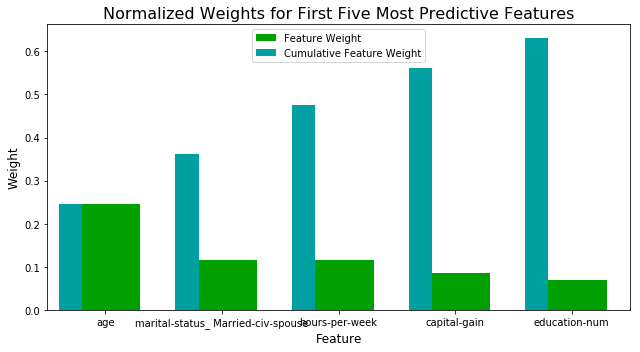

In [20]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

#### Answer - Question 7
Two out of five (age, hours-per-week), I assumed correctly. The feature education_num is related to education_level, so this value is explained as well.

The feature of capital_gain is explainable. If someone can sell objects or buildings at a profit, he must earn enough money. A poorly earning person would not be able to sell his possessions for profit, because he cannot wait for the optimal time.

The feature of marital-status_Married-civ-spouse does not make sense for me. I don't see why this property is related to income.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [21]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8427
F-score on testing data: 0.6856

Final Model trained on reduced data
------
Accuracy on testing data: 0.8279
F-score on testing data: 0.6516


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

#### Answer - Question 8
The accuracy and the F-Score of the model which was trained on the reduced data set are slightly lower than the results of the original model. 
The plot above shows the cumulative feature weight. This means, it is a representation how much of the data variantion is represented by these 5 features. In this data set, 60% of the 5 most important attributes of the data variance are mapped. This leads to the difference between the two trained models.

If the training time is relevant for a use case, you should first perform a principal component analysis to extract the most important features. Make sure that at least 80% of the data variance is covered. Depending on the data record, this can drastically reduce the number of features.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.